<a href="https://colab.research.google.com/github/mehmoodanalyst/stockAnalysis/blob/master/nifty_with_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# prompt: create code to predict time series data having multiple features which needs scaling , data needs to upload from csv

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nifty/1000 lines only of nifty data analysis.csv') # replace 'your_data.csv' with your file
df['date'] = pd.to_datetime(df['date'])
df.dtypes

print (df.head())


                       date    close  82.84     high      low     open  \
0 2015-01-09 10:18:00+05:30  8283.35  82.84  8283.35  8279.40  8280.70   
1 2015-01-09 10:19:00+05:30  8283.35  82.84  8283.70  8281.05  8283.05   
2 2015-01-09 10:20:00+05:30  8283.95  82.84  8284.15  8283.10  8283.65   
3 2015-01-09 10:21:00+05:30  8285.75  82.84  8285.75  8283.60  8283.75   
4 2015-01-09 10:22:00+05:30  8286.80  82.84  8287.70  8285.75  8286.20   

   volume     sma5     sma10        sma15  ...       fastk      fastd  \
0     0.0  8281.88  8280.065  8281.386667  ...   85.714286  67.108912   
1     0.0  8282.24  8280.370  8281.243333  ...   85.714286  75.198413   
2     0.0  8282.49  8280.840  8281.273333  ...   95.238095  88.888889   
3     0.0  8283.47  8281.840  8281.303333  ...  100.000000  93.650794   
4     0.0  8284.64  8282.815  8281.556667  ...   89.156627  94.798241   

   fastksr     fastdsr       ATR  Trange     TYPPRICE  HT_DCPERIOD      BETA  \
0    100.0   73.853949  3.652663    

<ipython-input-62-3036941e6e4a>:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nifty/1000 lines only of nifty data analysis.csv') # replace 'your_data.csv' with your file


In [63]:
# prompt: keep only 50 rows of dataframe df

df = df.head(300)
print(df.tail(1))


                         date    close  82.84     high      low     open  \
299 2015-01-09 15:17:00+05:30  8283.35  82.84  8285.35  8282.35  8283.65   

     volume     sma5    sma10        sma15  ...     fastk     fastd  fastksr  \
299     0.0  8285.63  8287.83  8283.686667  ...  7.380074  7.856733      0.0   

     fastdsr       ATR  Trange     TYPPRICE  HT_DCPERIOD      BETA  MFI  
299      0.0  4.704763     3.0  8283.683333    19.713043  0.295659  0.0  

[1 rows x 61 columns]


In [64]:
# prompt: show all column names of df
df.columns


Index(['date', 'close', '82.84', 'high', 'low', 'open', 'volume', 'sma5',
       'sma10', 'sma15', 'sma20', 'ema5', 'ema10', 'ema15', 'ema20', 'KAMA10',
       'KAMA20', 'KAMA30', 'TRIMA5', 'TRIMA10', 'TRIMA20', 'upperband',
       'middleband', 'lowerband', 'HT_TRENDLINE', 'SAR', 'ADX5', 'ADX10',
       'ADX20', 'APO', 'MOM10', 'MOM15', 'MOM20', 'ROC5', 'ROC10', 'ROC20',
       'RSI14', 'RSI8', 'CCI5', 'CCI10', 'CCI15', 'macd510', 'macd520',
       'macd1020', 'macd1520', 'macd1226', '82.84.1', 'WILLR', 'PPO', 'slowk',
       'slowd', 'fastk', 'fastd', 'fastksr', 'fastdsr', 'ATR', 'Trange',
       'TYPPRICE', 'HT_DCPERIOD', 'BETA', 'MFI'],
      dtype='object')

In [65]:
# prompt: generate new df1 by removing ['high', 'low', 'open', 'sma5', 'sma10', 'sma15', 'sma20', 'ema5', 'ema10', 'ema15', 'ema20', 'KAMA10', 'KAMA20', 'KAMA30', 'TRIMA5', 'TRIMA10', 'TYPPRICE']

df1 = df.drop(['high','82.84','low','82.84.1', 'open', 'sma5', 'sma10', 'sma15', 'sma20', 'ema5', 'ema10', 'ema15', 'ema20', 'KAMA10', 'KAMA20', 'KAMA30', 'TRIMA5', 'TRIMA10', 'TYPPRICE'], axis=1)



In [66]:
print(df1.columns)
len(df1.columns)

Index(['date', 'close', 'volume', 'TRIMA20', 'upperband', 'middleband',
       'lowerband', 'HT_TRENDLINE', 'SAR', 'ADX5', 'ADX10', 'ADX20', 'APO',
       'MOM10', 'MOM15', 'MOM20', 'ROC5', 'ROC10', 'ROC20', 'RSI14', 'RSI8',
       'CCI5', 'CCI10', 'CCI15', 'macd510', 'macd520', 'macd1020', 'macd1520',
       'macd1226', 'WILLR', 'PPO', 'slowk', 'slowd', 'fastk', 'fastd',
       'fastksr', 'fastdsr', 'ATR', 'Trange', 'HT_DCPERIOD', 'BETA', 'MFI'],
      dtype='object')


42

In [67]:
# prompt: identify most important columns for time series prediciton in df

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Assuming 'Close' is the target variable for prediction
target_column = 'close'

# ... (Rest of the code remains the same) ...

# Exclude 'date' column from features
features = [col for col in df1.columns if col != target_column and col != 'date']

X = df1[features]
y = df1[target_column]

# Impute missing values using SimpleImputer for X
imputer_X = SimpleImputer(strategy='mean') # Replace 'mean' with other strategies if needed
X = imputer_X.fit_transform(X) # Impute missing values in X

# Impute missing values using SimpleImputer for y (target variable)
imputer_y = SimpleImputer(strategy='mean')  # Choose an appropriate strategy
y = imputer_y.fit_transform(y.values.reshape(-1, 1))  # Reshape y for imputation
y = y.ravel()  # Flatten y back to original shape

# Feature selection using SelectKBest (ANOVA F-value)
num_features_to_select = 20  # Choose the number of top features to keep
selector = SelectKBest(score_func=f_regression, k=num_features_to_select)
X_new = selector.fit_transform(X, y)



# ... (Rest of the code remains the same) ...

In [68]:
print(X_new)
len(X_new)

[[8.28172273e+03 8.28385342e+03 8.28188000e+03 ... 3.65266348e+00
  3.95000000e+00 2.99113854e+01]
 [8.28137318e+03 8.28448000e+03 8.28224000e+03 ... 3.58104465e+00
  2.65000000e+00 2.95771163e+01]
 [8.28108182e+03 8.28512393e+03 8.28249000e+03 ... 3.40025575e+00
  1.05000000e+00 2.92678968e+01]
 ...
 [8.27863455e+03 8.29808644e+03 8.28998000e+03 ... 4.97712197e+00
  2.90000000e+00 1.94963699e+01]
 [8.28019182e+03 8.29680253e+03 8.28812000e+03 ... 4.83589897e+00
  3.00000000e+00 1.96928866e+01]
 [8.28170318e+03 8.29027784e+03 8.28563000e+03 ... 4.70476333e+00
  3.00000000e+00 1.97130432e+01]]


300

In [69]:
# prompt: show headere of these top five columns paramerter X_new

import pandas as pd
# ... (your existing code) ...

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [features[i] for i in selected_feature_indices]

# Print the names of the selected features
print("Selected features:", selected_feature_names)


Selected features: ['TRIMA20', 'upperband', 'middleband', 'lowerband', 'HT_TRENDLINE', 'ADX10', 'ADX20', 'APO', 'MOM15', 'MOM20', 'ROC20', 'RSI14', 'macd520', 'macd1020', 'macd1520', 'macd1226', 'PPO', 'ATR', 'Trange', 'HT_DCPERIOD']


In [70]:
# prompt: predict next close price

import numpy as np
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()  # Create a scaler for features (X)
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()  # Create a separate scaler for the target (y)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))  # Reshape y_train for scaling
y_test = scaler_y.transform(y_test.reshape(-1, 1))  # Reshape y_test for scaling


# Reshape the data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
# Use scaler_y to inverse transform y_pred and y_test
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

# Evaluate the model (example: Mean Squared Error)
mse = np.mean(np.square(y_pred - y_test))
print(f"Mean Squared Error: {mse}")

# Predict the next close price (example: using the last data point)
last_data_point = X_new[-1].reshape(1, 1, X_new.shape[1])
last_data_point_scaled = scaler_X.transform(last_data_point.reshape(1,-1)).reshape(1,1,-1) # Use scaler_X here
next_price_prediction = model.predict(last_data_point_scaled)
next_price_prediction = scaler_y.inverse_transform(next_price_prediction) # Use scaler_y here
print(f"Predicted next close price: {next_price_prediction[0][0]}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Mean Squared Error: 5.2825623397825145
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted next close price: 8286.1630859375


**bold text**# New Section

In [71]:
# prompt: suggest best model for classifying line into similar groups

from sklearn.cluster import KMeans

# Assuming X_new contains your numerical features after preprocessing

# Determine the optimal number of clusters (e.g., using the elbow method or silhouette score)
# ... (Code for finding optimal k) ...

kmeans = KMeans(n_clusters=3, random_state=42) # Replace 3 with the optimal k
df['cluster'] = kmeans.fit_predict(X_new)




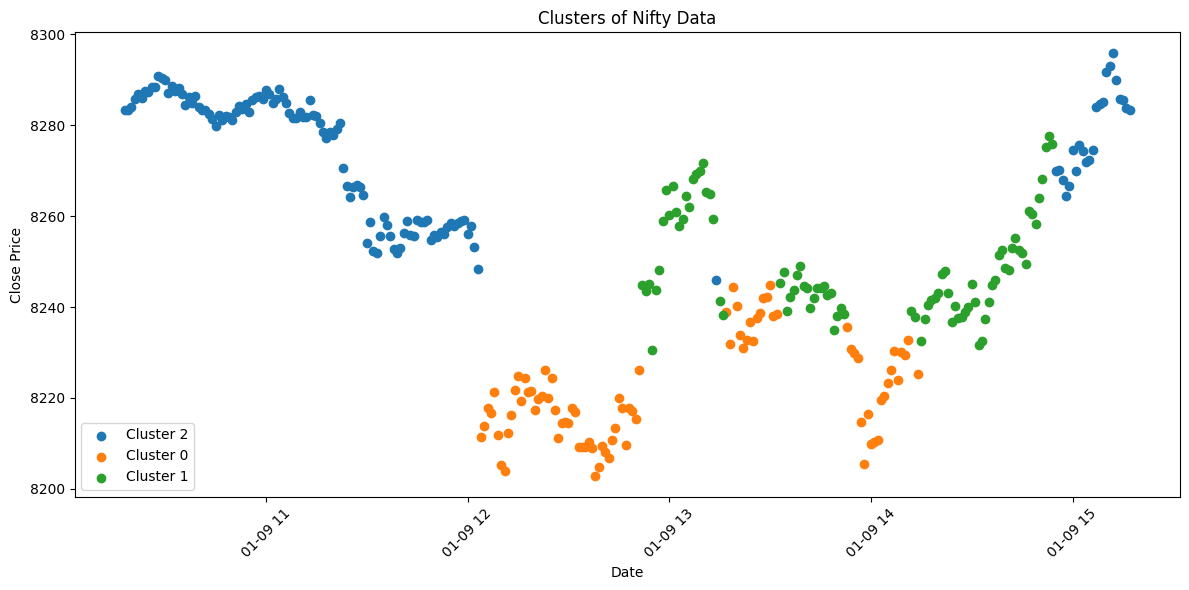

In [72]:
# prompt: show these clusters on plot

import matplotlib.pyplot as plt

# Assuming 'date' and 'close' columns exist in your DataFrame 'df'
plt.figure(figsize=(12, 6))
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['date'], cluster_data['close'], label=f'Cluster {cluster}')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Clusters of Nifty Data')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


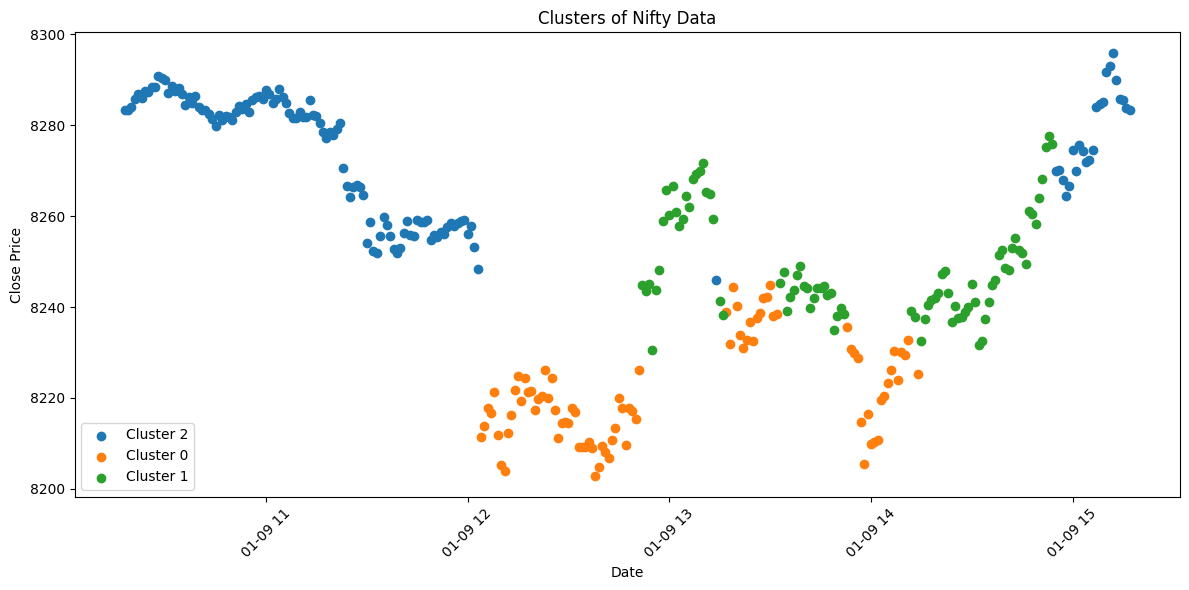

In [73]:
# prompt: show these clusters on plot

import matplotlib.pyplot as plt

# Assuming 'date' and 'close' columns exist in your DataFrame 'df'
plt.figure(figsize=(12, 6))
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    # Drop rows with NaT values in the 'date' column
    cluster_data = cluster_data.dropna(subset=['date'])
    plt.scatter(cluster_data['date'], cluster_data['close'], label=f'Cluster {cluster}')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Clusters of Nifty Data')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [74]:
# prompt: predict chances that in next 10 minutes there will be atleast 2 point changes close price

import numpy as np

# Assuming 'y_pred' contains your predicted close prices and 'y_test' contains actual prices.
# Replace these with your actual prediction and test data.

# Example:
# y_pred = model.predict(X_test)  # Your model's predictions
# y_test = scaler_y.inverse_transform(y_test) # Your actual test data

# Calculate point changes
point_changes = np.abs(np.diff(y_pred))

# Set a threshold for a "significant" point change (adjust as needed)
significant_change_threshold = 0.5

# Count significant point changes within the next 10 minutes (assuming 1 data point represents 1 minute)

num_significant_changes = 0
for i in range(min(10, len(point_changes))):  # Consider only the next 10 minutes
  if point_changes[i] >= significant_change_threshold:
    num_significant_changes += 1

# Calculate the probability based on the number of significant changes
probability = num_significant_changes / min(10,len(point_changes)) if min(10,len(point_changes)) > 0 else 0 # Avoid division by zero

# Print the probability or use it for further analysis
print(f"Probability of at least 2 significant point changes in the next 10 minutes: {probability}")

# Further analysis or decision-making based on the probability.
if probability >= 0.5: # Example threshold for decision making
  print("High probability of significant price fluctuations")
else:
  print("Low probability of significant price fluctuations")



Probability of at least 2 significant point changes in the next 10 minutes: 0.0
Low probability of significant price fluctuations


<ipython-input-74-eb063d64df52>:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if point_changes[i] >= significant_change_threshold:


In [75]:
# prompt: use data set df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nifty/1000 lines only of nifty data analysis.csv')  and predict chances that in next 10 minutes there will be atleast 2 point changes in close price

# Assuming 'y_pred' contains your predicted close prices and 'y_test' contains actual prices.
# Replace these with your actual prediction and test data.

# Example:
# y_pred = model.predict(X_test)  # Your model's predictions
# y_test = scaler_y.inverse_transform(y_test) # Your actual test data

# Calculate point changes
point_changes = np.abs(np.diff(y_pred))

# Set a threshold for a "significant" point change (adjust as needed)
significant_change_threshold = 2  # Changed to 2 points

# Count significant point changes within the next 10 minutes (assuming 1 data point represents 1 minute)
num_significant_changes = 0
for i in range(min(10, len(point_changes))):  # Consider only the next 10 minutes
    if point_changes[i] >= significant_change_threshold:
        num_significant_changes += 1

# Calculate the probability based on the number of significant changes
probability = num_significant_changes / min(10, len(point_changes)) if min(10, len(point_changes)) > 0 else 0  # Avoid division by zero

# Print the probability or use it for further analysis
print(f"Probability of at least 2 significant point changes (>=2 points) in the next 10 minutes: {probability}")

# Further analysis or decision-making based on the probability.
if probability >= 0.5:  # Example threshold for decision making
    print("High probability of significant price fluctuations")
else:
    print("Low probability of significant price fluctuations")


Probability of at least 2 significant point changes (>=2 points) in the next 10 minutes: 0.0
Low probability of significant price fluctuations


<ipython-input-75-6ac134ff3a29>:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if point_changes[i] >= significant_change_threshold:
